# Experiment Evaluation
Look at experiment results, compare them and find representative examples for the thesis motivation.

In [2]:
import os
from glob import glob
import yaml
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir("..")

### Load Experiment Results

In [15]:
experiment_name = "unimodal_gaussian"

path = f"results\\{experiment_name}\\**\\"
files = glob(path + "*.yaml", recursive=True)

df = pd.DataFrame()
for file in files:
    # flatten yaml and convert to dataframe (concat column names with _)
    df_temp = yaml.load(open(file), Loader=yaml.FullLoader)
    # flatten the dictionary
    df_temp = pd.json_normalize(df_temp, sep="_")

    # add file name as column
    df_temp["file"] = file.split("/")[-1]
    # add to dataframe
    df = pd.concat([df, df_temp], ignore_index=True)

df

,data_config_id,experiment_id,experiment_name,seed,data_covs,data_means,data_num_samples,data_weights,parameters_burnin,parameters_init_m,...,parameters_mdecay,parameters_mresampling,parameters_n_batches,parameters_step_size,results_metrics_nll,results_metrics_wasserstein,results_plot_path,results_runtime_seconds,results_trajectory_path,file
0,2,20250424_230202,unimodal_gaussian,3,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",...,0.01,0.0,5,0.01,3.129660,0.000024,results\unimodal_gaussian\data_00da76\20250424...,43.792487,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
1,2,20250424_230303,unimodal_gaussian,3,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",...,0.05,0.0,5,0.01,3.218345,0.000024,results\unimodal_gaussian\data_00da76\20250424...,43.956792,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
2,2,20250424_230404,unimodal_gaussian,3,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",...,0.01,0.0,5,0.05,3.574145,0.000017,results\unimodal_gaussian\data_00da76\20250424...,44.045918,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
3,2,20250424_230506,unimodal_gaussian,3,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",...,0.05,0.0,5,0.05,3.513764,0.000019,results\unimodal_gaussian\data_00da76\20250424...,44.554697,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
4,2,20250424_230609,unimodal_gaussian,3,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[0.9967898726463318, 1.01206636428833]",...,0.01,0.0,5,0.01,3.126740,0.000024,results\unimodal_gaussian\data_00da76\20250424...,44.239297,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
5,2,20250424_230725,unimodal_gaussian,3,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[0.9967898726463318, 1.01206636428833]",...,0.05,0.0,5,0.01,3.218595,0.000024,results\unimodal_gaussian\data_00da76\20250424...,57.972703,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
6,2,20250424_230816,unimodal_gaussian,3,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[0.9967898726463318, 1.01206636428833]",...,0.01,0.0,5,0.05,3.573700,0.000017,results\unimodal_gaussian\data_00da76\20250424...,36.373923,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
7,2,20250424_230907,unimodal_gaussian,3,"[[[1, 0], [0, 1]]]","[[0, 0]]",1000,[1],0,"[0.9967898726463318, 1.01206636428833]",...,0.05,0.0,5,0.05,3.515145,0.000019,results\unimodal_gaussian\data_00da76\20250424...,36.754232,results\unimodal_gaussian\data_00da76\20250424...,results\unimodal_gaussian\data_00da76\20250424...
8,5,20250424_232323,unimodal_gaussian,3,"[[[5.0, 0.0], [0.0, 0.20000000298023224]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",...,0.01,0.0,5,0.01,4.356920,0.000018,results\unimodal_gaussian\data_6e96b0\20250424...,36.402281,results\unimodal_gaussian\data_6e96b0\20250424...,results\unimodal_gaussian\data_6e96b0\20250424...
9,5,20250424_232413,unimodal_gaussian,3,"[[[5.0, 0.0], [0.0, 0.20000000298023224]]]","[[0, 0]]",1000,[1],0,"[1.0, 1.0]",...,0.05,0.0,5,0.01,3.611682,0.000021,results\unimodal_gaussian\data_6e96b0\20250424...,36.423610,results\unimodal_gaussian\data_6e96b0\20250424...,results\unimodal_gaussian\data_6e96b0\20250424...


In [16]:
# rename columns with prefix "parameters_"
df = df.rename(columns=lambda x: x.replace("parameters_", "").replace("results_metrics_", ""))

## Best HPs per setting

After visual inspection of the sampling trajectories we determined, that 

In [17]:
df.columns

Index(['data_config_id', 'experiment_id', 'experiment_name', 'seed',
       'data_covs', 'data_means', 'data_num_samples', 'data_weights', 'burnin',
       'init_m', 'mcmc_samples', 'mdecay', 'mresampling', 'n_batches',
       'step_size', 'nll', 'wasserstein', 'results_plot_path',
       'results_runtime_seconds', 'results_trajectory_path', 'file'],
      dtype='object')

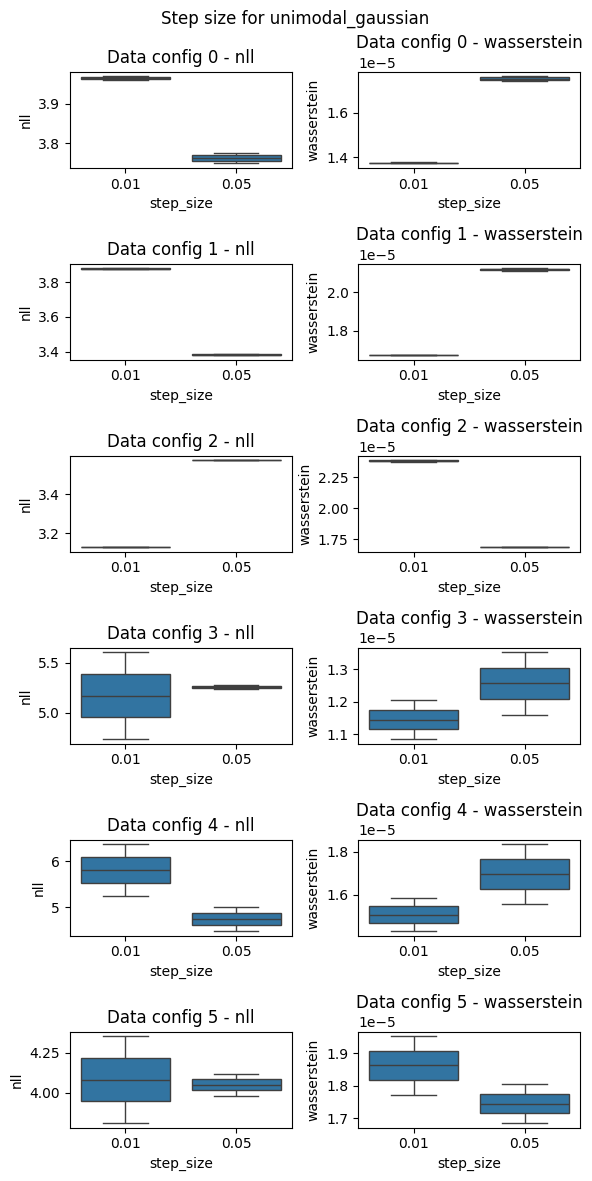

In [ ]:
metrics = ["nll", "wasserstein"]
param = "step_size"

fig, axs = plt.subplots(max(df["data_config_id"]) + 1, 2, figsize=(6, 12))
fig.suptitle(f"Step size for {experiment_name}")
for data_idx in df["data_config_id"].unique():
    for i, metric in enumerate(metrics):
        # filter dataframe for the current data_config_id and metric
        df_temp = df[df["data_config_id"] == data_idx]

        # # only evaluate where mdecay= 0.01
        # df_temp = df_temp[df_temp["mdecay"] == 0.01]

        sns.boxplot(data=df_temp, x=param, y=metric, ax=axs[data_idx, i])
        axs[data_idx, i].set_title(f"Data config {data_idx} - {metric}")

plt.tight_layout()

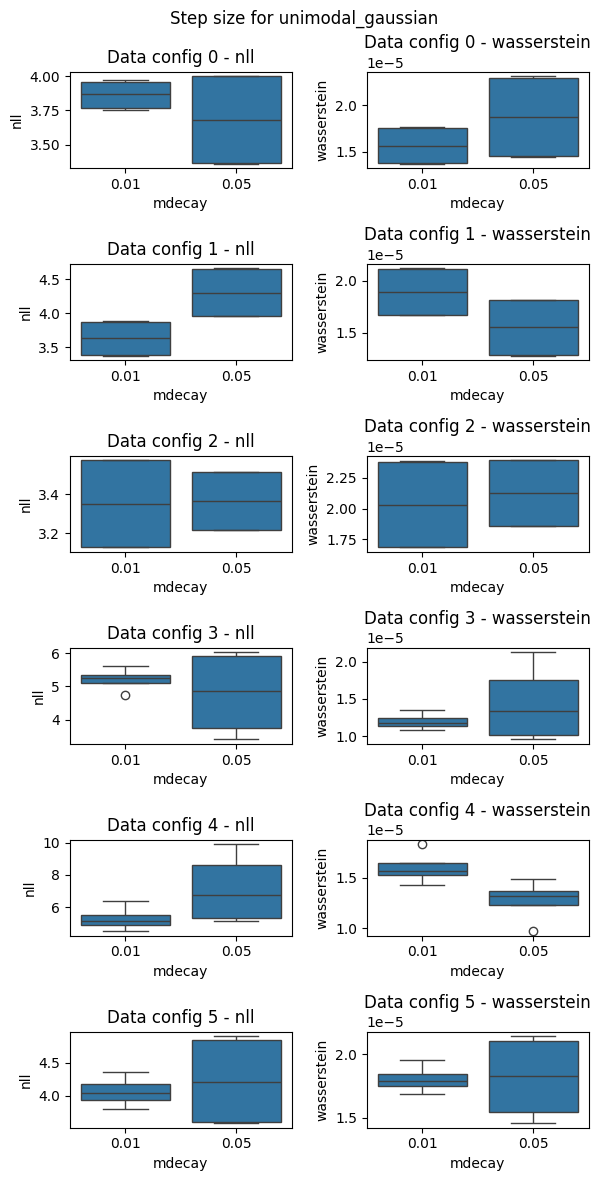

In [38]:
param = "mdecay"

fig, axs = plt.subplots(max(df["data_config_id"]) + 1, 2, figsize=(6, 12))
fig.suptitle(f"Step size for {experiment_name}")
for data_idx in df["data_config_id"].unique():
    for i, metric in enumerate(metrics):
        sns.boxplot(
            data=df[df["data_config_id"] == data_idx], x=param, y=metric, ax=axs[data_idx, i]
        )
        axs[data_idx, i].set_title(f"Data config {data_idx} - {metric}")

plt.tight_layout()